<a href="https://colab.research.google.com/github/OnlyourMiracle/MachineLearning/blob/master/Course/PythonMachineLearning/PythonMachineLerning_U13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
g = tf.Graph()
with g.as_default():
  x = tf.placeholder(dtype=tf.float32, shape=(None), name='x')
  w = tf.Variable(2.0, name='weight')
  b = tf.Variable(0.7, name='bias')

  z = w*x + b
  init = tf.global_variables_initializer()

with tf.Session(graph=g) as sess:
  sess.run(init)
  for t in [1.0, 0.6, -1.8]:
    print('x=%4.1f --> z=%4.1f' % (t, sess.run(z, feed_dict={x:t})))
    

x= 1.0 --> z= 2.7
x= 0.6 --> z= 1.9
x=-1.8 --> z=-2.9


In [ ]:

import numpy as np

g = tf.Graph()
with g.as_default():
  x = tf.placeholder(dtype=tf.float32, shape=(None, 2, 3), name='input_x')
  x2 = tf.reshape(x, shape=(-1, 6), name='x2')

  xsum = tf.reduce_sum(x2, axis=0, name='col_sum')
  xmean = tf.reduce_mean(x2, axis=0, name='col_mean')

with tf.Session(graph=g) as sess:
  x_array = np.arange(18).reshape(3,2,3)
  print('input shape:', x_array.shape)
  print('Reshaped:\n', sess.run(x2, feed_dict={x:x_array}))
  print('Column Sums:\n', sess.run(xsum, feed_dict={x:x_array}))
  print('Column Means:\n', sess.run(xmean, feed_dict={x:x_array}))

input shape: (3, 2, 3)
Reshaped:
 [[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]
 [12. 13. 14. 15. 16. 17.]]
Column Sums:
 [18. 21. 24. 27. 30. 33.]
Column Means:
 [ 6.  7.  8.  9. 10. 11.]


In [ ]:
#produce data
x_train = np.arange(10).reshape((10,1))
y_train = np.array([1.0, 1.3, 3.1,
                    2.0, 5.0, 6.3, 
                    6.6, 7.4, 8.0, 
                    9.0])

#make linreg model
class TfLinreg(object):
  def __init__(self, x_dim, learning_rate=0.01, random_seed=None):
    self.x_dim = x_dim 
    self.learning_rate = learning_rate
    self.g = tf.Graph()
    with self.g.as_default():
      tf.set_random_seed(random_seed)
      self.build()
      self.init_op = tf.global_variables_initializer()
  def build(self):
    self.x = tf.placeholder(dtype=tf.float32, shape=(None, self.x_dim), name='x_input')
    self.y = tf.placeholder(dtype=tf.float32, shape=(None), name='y_input')
    print(self.x)
    print(self.y)
    w = tf.Variable(tf.zeros(shape=(1)), name='weight')
    b = tf.Variable(tf.zeros(shape=(1)), name='bias')
    print(w)
    print(b)

    self.z_net =tf.squeeze(w*self.x + b, name='z_net')
    print(self.z_net)

    sqr_errors = tf.square(self.y - self.z_net, name='sqr_errors')
    print(sqr_errors)
    
    self.mean_cost = tf.reduce_mean(sqr_errors, name='mean_cost')

    optimizer = tf.train.GradientDescentOptimizer(learning_rate=self.learning_rate, name='GrandientDescnet')
    self.optimizer = optimizer.minimize(self.mean_cost)


In [ ]:
#build a example
lrmodel = TfLinreg(x_dim=x_train.shape[1], learning_rate=0.01)

Tensor("x_input:0", shape=(?, 1), dtype=float32)
Tensor("y_input:0", dtype=float32)
<tf.Variable 'weight:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'bias:0' shape=(1,) dtype=float32_ref>
Tensor("z_net:0", dtype=float32)
Tensor("sqr_errors:0", dtype=float32)


In [ ]:
def train_linreg(sess, model, x_train, y_train, num_epochs=10):
  sess.run(model.init_op)
  training_costs = []
  for i in range(num_epochs):
    _, cost = sess.run([model.optimizer, model.mean_cost], feed_dict={model.x:x_train, model.y:y_train}) 
    training_costs.append(cost)
  return training_costs

In [ ]:
sess = tf.Session(graph=lrmodel.g)
training_costs = train_linreg(sess, lrmodel, x_train, y_train)

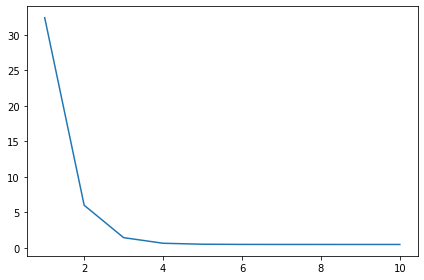

In [ ]:
from matplotlib import pyplot as plt

plt.plot(range(1, len(training_costs) + 1), training_costs)
plt.tight_layout()

In [ ]:
def predict_linreg(sess, model, x_test):
  y_pred = sess.run(model.z_net, feed_dict={model.x:x_test})
  return y_pred


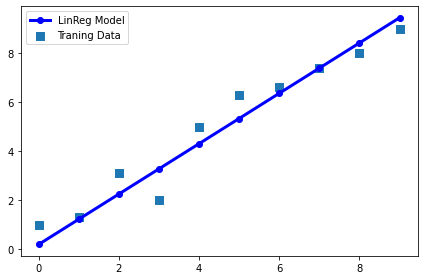

In [ ]:
plt.scatter(x_train, y_train, marker='s', s=50, label='Traning Data')
plt.plot(range(x_train.shape[0]), predict_linreg(sess, lrmodel, x_train), color='blue', marker='o', markersize=6, linewidth=3, label='LinReg Model')
plt.legend()
plt.tight_layout()

In [ ]:
#input data
import numpy as np 

mnist = np.load('/content/drive/MyDrive/MLIA/Data/mnist/mnist_scaled.npz')
x_train, y_train, x_test, y_test = [mnist[f] for f in mnist.files]
print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [ ]:
#build model

n_features = x_train.shape[1]
n_classes = 10
random_seed = 123
np.random.seed=(random_seed)

g = tf.Graph()
with g.as_default():
  tf.set_random_seed(random_seed)
  tf_x = tf.placeholder(dtype=np.float32, shape=(None, n_features), name='tf_x')
  tf_y = tf.placeholder(dtype=np.int32, shape=None, name='tf_y')
  y_onehot = tf.one_hot(indices=tf_y, depth=n_classes)
  h1 = tf.layers.dense(inputs=tf_x, units=50, activation=tf.tanh, name='layer1')
  h2 = tf.layers.dense(inputs=h1, units=50, activation=tf.tanh, name='layer2')
  logits = tf.layers.dense(inputs=h2, units=10, activation=None, name='layer3')
  predictions = {
      'classes':tf.argmax(logits, axis=1, name='predicted_classes'),
      'probabilities':tf.nn.softmax(logits, name='softmax_tensor')
  }

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  app.launch_new_instance()


In [ ]:
#define cost function and optimizer
with g.as_default():
  cost = tf.losses.softmax_cross_entropy(onehot_labels=y_onehot, logits=logits)
  optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
  train_op = optimizer.minimize(loss=cost)
  init_op = tf.global_variables_initializer()

In [ ]:
def create_batch_generator(x, y, batch_size=128, shuffle=False):
  x_copy = np.array(x)
  y_copy = np.array(y)

  if shuffle:
    data = np.column_stack((x_copy, y_copy))
    np.random.shuffle(data)
    x_copy = data[:, :-1]
    y_copy = data[:, -1].astype(int)

  for i in range(0, x.shape[0], batch_size):
    yield(x_copy[i:i+batch_size, :], y_copy[i:i+batch_size])

In [ ]:
#create a session to launch the graph
sess = tf.Session(graph=g)
sess.run(init_op)

#50 epochs of training 
training_costs = []
for epoch in range(50):
  training_loss = []
  batch_generator = create_batch_generator(x_train, y_train, batch_size=64)
  for batch_x, batch_y in batch_generator:
    feed = {tf_x:batch_x, tf_y:batch_y}
    _, batch_cost = sess.run([train_op, cost], feed_dict=feed)
    training_costs.append(batch_cost)
    print('-- Epoch %2d ''Avg. Training Loss:%.4f' % (epoch+1, np.mean(training_costs)))

流式输出内容被截断，只能显示最后 5000 行内容。
-- Epoch 45 Avg. Training Loss:0.3954
-- Epoch 45 Avg. Training Loss:0.3954
-- Epoch 45 Avg. Training Loss:0.3954
-- Epoch 45 Avg. Training Loss:0.3954
-- Epoch 45 Avg. Training Loss:0.3954
-- Epoch 45 Avg. Training Loss:0.3954
-- Epoch 45 Avg. Training Loss:0.3954
-- Epoch 45 Avg. Training Loss:0.3954
-- Epoch 45 Avg. Training Loss:0.3954
-- Epoch 45 Avg. Training Loss:0.3954
-- Epoch 45 Avg. Training Loss:0.3954
-- Epoch 45 Avg. Training Loss:0.3954
-- Epoch 45 Avg. Training Loss:0.3954
-- Epoch 45 Avg. Training Loss:0.3953
-- Epoch 45 Avg. Training Loss:0.3953
-- Epoch 45 Avg. Training Loss:0.3953
-- Epoch 45 Avg. Training Loss:0.3953
-- Epoch 45 Avg. Training Loss:0.3953
-- Epoch 45 Avg. Training Loss:0.3953
-- Epoch 45 Avg. Training Loss:0.3953
-- Epoch 45 Avg. Training Loss:0.3953
-- Epoch 45 Avg. Training Loss:0.3953
-- Epoch 45 Avg. Training Loss:0.3953
-- Epoch 45 Avg. Training Loss:0.3953
-- Epoch 45 Avg. Training Loss:0.3953
-- Epoch 45 Avg. Traini

In [ ]:
#do prediction on the test set
feed = {tf_x:x_test}
y_pred = sess.run(predictions['classes'], feed_dict=feed)
print('Test Accuracy: %.2f%%' % (100*np.sum(y_pred == y_test)/y_test.shape[0]))

Test Accuracy: 93.76%


In [ ]:
mean_values = np.mean(x_train, axis=0)
std_value = np.std(x_train)

x_train_centered = (x_train - mean_values)/std_value
x_test_centered = (x_test - mean_values)/std_value 

In [ ]:
#preprocessing data
import tensorflow.keras as keras

np.random.seed=(123)
tf.set_random_seed(123)

y_train_onehot = keras.utils.to_categorical(y_train)

In [ ]:
model = keras.models.Sequential()

model.add(
    keras.layers.Dense(
        units=50,    
        input_dim=x_train_centered.shape[1],
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='tanh'))

model.add(
    keras.layers.Dense(
        units=50,    
        input_dim=50,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='tanh'))

model.add(
    keras.layers.Dense(
        units=y_train_onehot.shape[1],    
        input_dim=50,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='softmax'))


sgd_optimizer = keras.optimizers.SGD(
        lr=0.001, decay=1e-7, momentum=.9)

model.compile(optimizer=sgd_optimizer,
              loss='categorical_crossentropy')


In [ ]:
#training model
#通过设置verbose=1来跟踪成本函数的优化

history = model.fit(x_train_centered, y_train_onehot, batch_size=64, epochs=50, verbose=1, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
53568/54000 [============================>.] - ETA: 0s - loss: 0.7129

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


54000/54000 [==============================] - 3s 52us/sample - loss: 0.7109 - val_loss: 0.3622
Epoch 2/50
54000/54000 [==============================] - 2s 45us/sample - loss: 0.3722 - val_loss: 0.2781
Epoch 3/50
54000/54000 [==============================] - 2s 45us/sample - loss: 0.3066 - val_loss: 0.2418
Epoch 4/50
54000/54000 [==============================] - 3s 47us/sample - loss: 0.2697 - val_loss: 0.2191
Epoch 5/50
54000/54000 [==============================] - 2s 40us/sample - loss: 0.2436 - val_loss: 0.2030
Epoch 6/50
54000/54000 [==============================] - 2s 43us/sample - loss: 0.2235 - val_loss: 0.1905
Epoch 7/50
54000/54000 [==============================] - 3s 52us/sample - loss: 0.2069 - val_loss: 0.1802
Epoch 8/50
54000/54000 [==============================] - 3s 46us/sample - loss: 0.1932 - val_loss: 0.1716
Epoch 9/50
54000/54000 [==============================] - 2s 42us/sample - loss: 0.1814 - val_loss: 0.1636
Epoch 10/50
54000/54000 [=======================

In [ ]:
#predict
y_train_pred = model.predict(x_train_centered, verbose=0)
y_train_pred = np.argmax(y_train_pred, axis=1)
print('First 3 predictions:', y_train_pred[:3])

correct_preds = np.sum(y_train == y_train_pred, axis=0)
train_acc = correct_preds / y_train.shape[0]
print('training accuracy: %.2f%%' % (train_acc * 100))


y_test_pred = model.predict(x_test_centered, verbose=0)
y_test_pred = np.argmax(y_test_pred, axis=1)
correct_preds = np.sum(y_test == y_test_pred, axis=0)
test_acc = correct_preds / y_test.shape[0]
print('Test accuracy: %.2f%%' % (test_acc * 100))

First 3 predictions: [5 0 4]
training accuracy: 98.95%
Test accuracy: 95.98%
